# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [86]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
# Set the API base URL

url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #https://api.openweathermap.org/data/2.5/weather?
    city_url = f"q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url + city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yangor
City not found. Skipping...
Processing Record 2 of Set 1 | saipan
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | lionel town
Processing Record 5 of Set 1 | keflavik
Processing Record 6 of Set 1 | stanley
Processing Record 7 of Set 1 | vorgashor
Processing Record 8 of Set 1 | ancud
Processing Record 9 of Set 1 | vadso
Processing Record 10 of Set 1 | puerto aysen
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | ornskoldsvik
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | pamandzi
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | crozet
Processing Record 21 of Set 1 | nouadhibou
Processing Record 22 of Set 1 | klaksvik
Proc

In [31]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [32]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saipan,15.1355,145.7010,28.39,61,75,9.77,MP,1708310674
1,margaret river,-33.9500,115.0667,27.36,42,100,4.00,AU,1708310675
2,lionel town,17.8101,-77.2406,27.94,84,46,3.12,JM,1708310675
3,keflavik,64.0049,-22.5624,4.24,93,75,3.09,IS,1708310676
4,stanley,54.8680,-1.6985,9.04,85,20,3.09,GB,1708310537


In [33]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [34]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saipan,15.1355,145.7010,28.39,61,75,9.77,MP,1708310674
1,margaret river,-33.9500,115.0667,27.36,42,100,4.00,AU,1708310675
2,lionel town,17.8101,-77.2406,27.94,84,46,3.12,JM,1708310675
3,keflavik,64.0049,-22.5624,4.24,93,75,3.09,IS,1708310676
4,stanley,54.8680,-1.6985,9.04,85,20,3.09,GB,1708310537


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

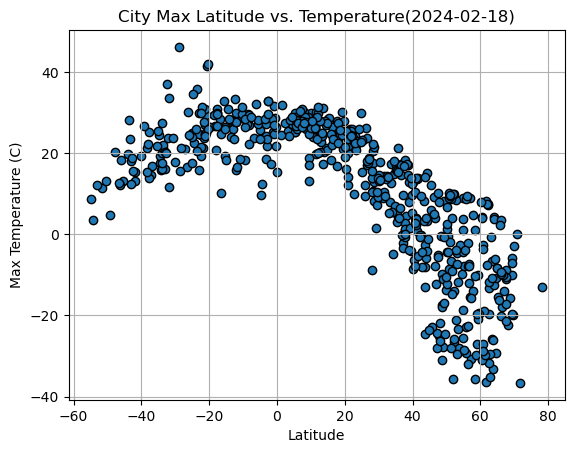

In [43]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],marker='o',edgecolor = "black")

# Incorporate the other graph properties
current_date = pd.Timestamp.now().date()
plt.title(f'City Max Latitude vs. Temperature({current_date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

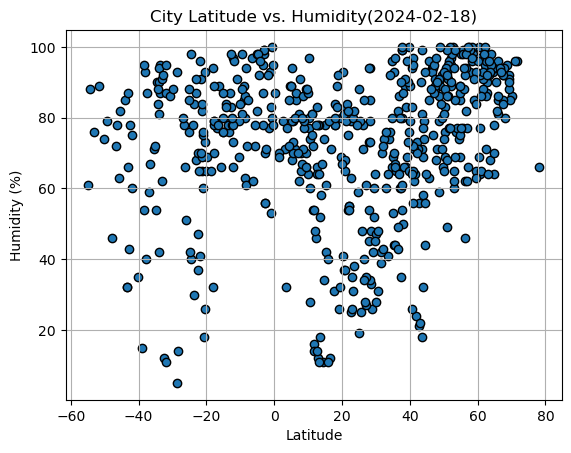

In [44]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o',edgecolors='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity({current_date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

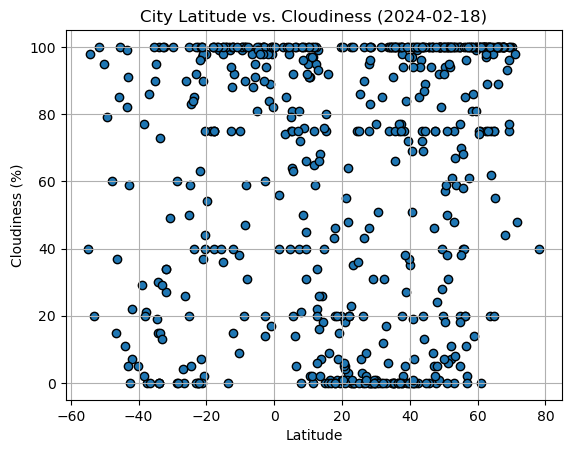

In [45]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o',edgecolors='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({current_date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

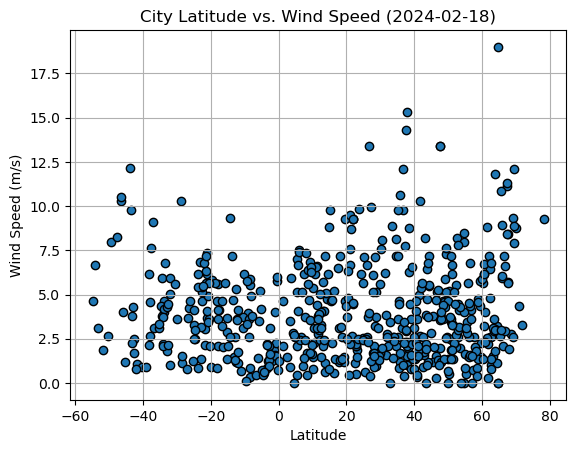

In [46]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o',edgecolors='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({current_date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [75]:
# Define a function to create Linear Regression plots

def linear_regression(x_values, y_values,x,y):

    (slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
    regress_values = x_values* slope + intercept
    line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    print(f'The r-value is: {rvalue**2}')
    plt.scatter(x_values,y_values, marker='o')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.plot(x_values,regress_values, 'r-')
    plt.annotate(line_eq,((min(x_values)+5),(min(y_values)+5)),fontsize=15,color='r')
    plt.show()

In [69]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)


northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saipan,15.1355,145.7010,28.39,61,75,9.77,MP,1708310674
2,lionel town,17.8101,-77.2406,27.94,84,46,3.12,JM,1708310675
3,keflavik,64.0049,-22.5624,4.24,93,75,3.09,IS,1708310676
4,stanley,54.8680,-1.6985,9.04,85,20,3.09,GB,1708310537
5,vorgashor,67.5833,63.9500,-11.04,92,100,8.40,RU,1708310677


In [70]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,margaret river,-33.9500,115.0667,27.36,42,100,4.00,AU,1708310675
6,ancud,-41.8697,-73.8203,13.18,75,7,1.08,CL,1708310677
8,puerto aysen,-45.4000,-72.7000,13.15,82,100,1.20,CL,1708310678
11,adamstown,-25.0660,-130.1015,24.92,76,100,3.28,PN,1708310680
13,waitangi,-43.9535,-176.5597,19.90,85,11,12.14,NZ,1708310681


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6938740723911592


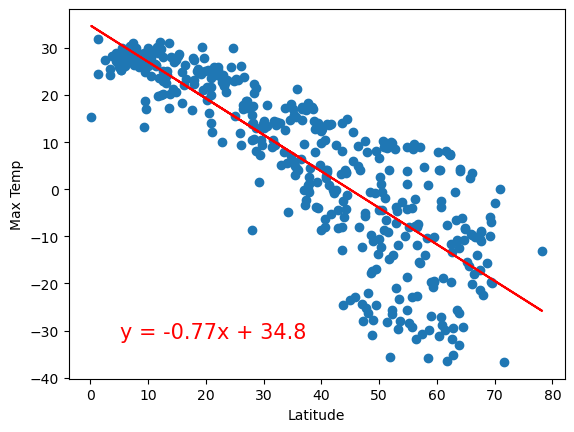

In [76]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],'Latitude','Max Temp')

The r-value is: 0.24168260983323486


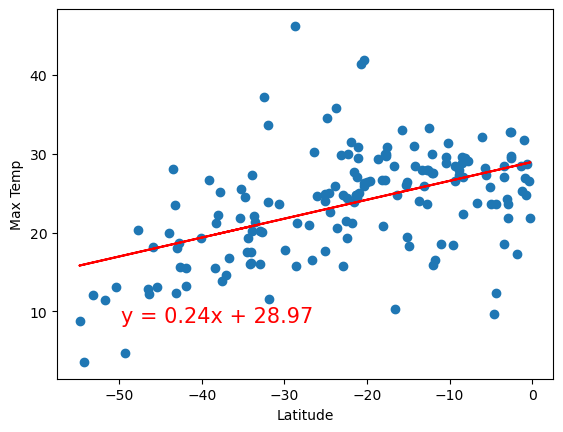

In [77]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],'Latitude','Max Temp')

Discussion about the linear relationship:

-	As we get farther away north or south from the equator, the temperature drops. 
-	In the Northern hemisphere 69% of the variability in temperature can be explained by latitude. Also, there is a negative correlation between latitude and temperature. 
-	In the Southern hemisphere 24% of the variability in temperature can be explained by latitude. Also, there is a positive correlation between latitude and temperature. 


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1665610193876917


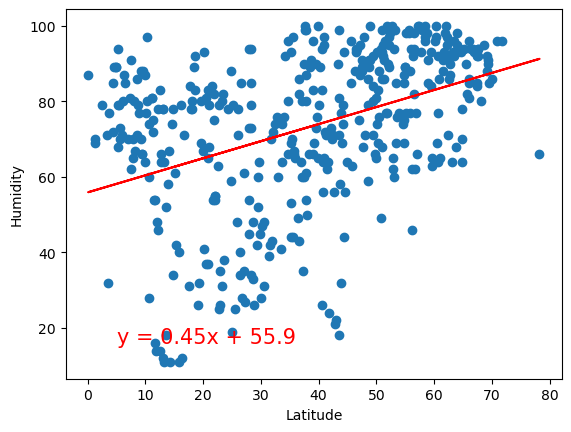

In [81]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Latitude','Humidity')

The r-value is: 0.0731839696409544


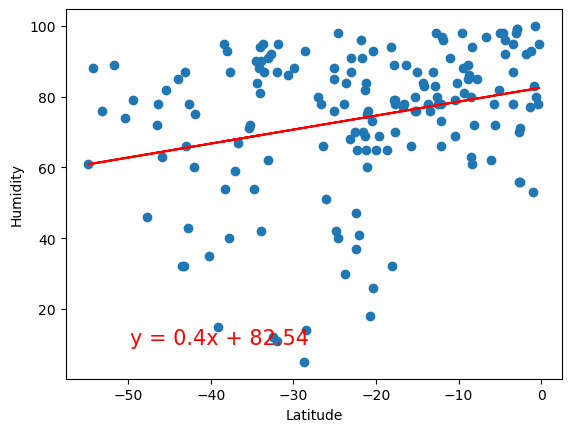

In [80]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],'Latitude','Humidity')

Discussion about the linear relationship:

R-squared in the Northern hemisphere is 0.17 and in the Southern hemisphere is 0.07. Both values are close to zero therefore latitude does not explain much of the variability in humidity, suggesting a poor fit of the model.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06836906035365929


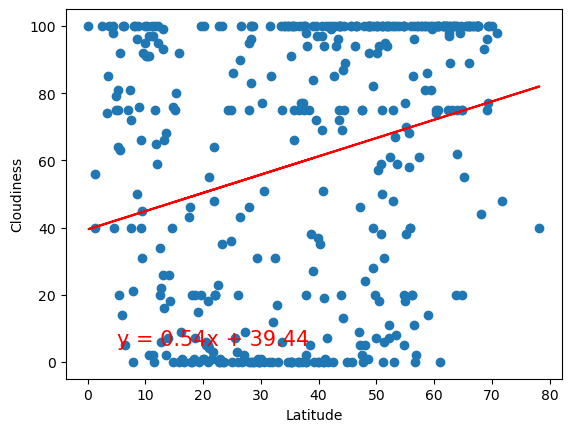

In [82]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],'Latitude','Cloudiness')

The r-value is: 0.12423660546330385


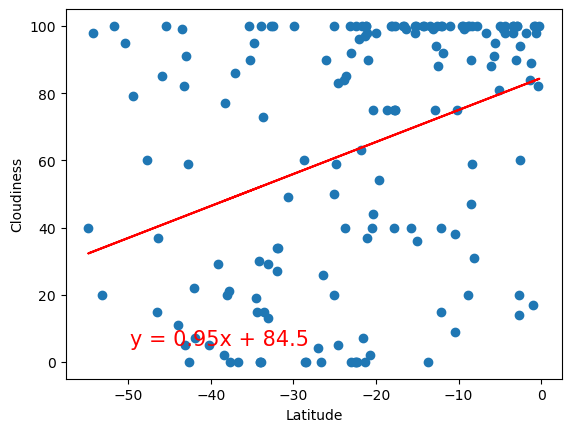

In [83]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],'Latitude','Cloudiness')

Discussion about the linear relationship:

R-squared in the Northern hemisphere is 0.07 and in the Southern hemisphere is 0.12. Both values are close to zero therefore latitude does not explain much of the variability in cloudiness, suggesting a poor fit of the model.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.004968175698346826


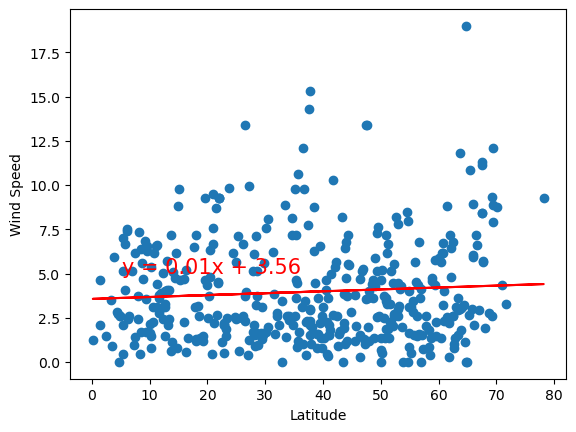

In [84]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],'Latitude','Wind Speed')

The r-value is: 0.09613162992427722


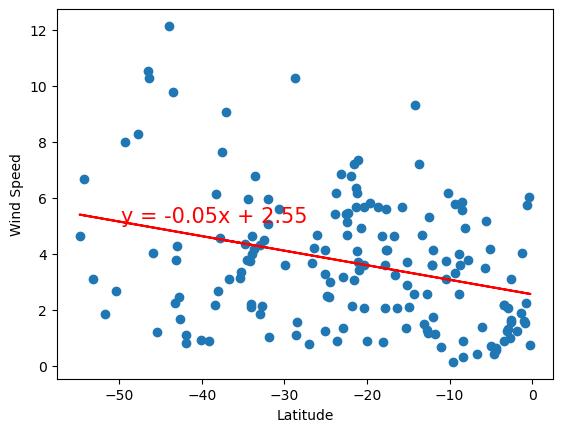

In [85]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],'Latitude','Wind Speed')

Discussion about the linear relationship:

R-squared in the Northern hemisphere is 0.005 and in the Southern hemisphere is 0.096. Both values are close to zero therefore latitude does not explain much of the variability in wind speed, suggesting a poor fit of the model.